# Locating Halos/subhalo Galaxies CAMELS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py
%matplotlib inline
#%matplotlib notebook

In [69]:
# catalogue name
catalogue = r'C:\CAMELS DATA\LH643_fof_subhalo_tab_033.hdf5'

# value of the scale factor
scale_factor = 1.0

# open the catalogue
f = h5py.File(catalogue, 'r')
# looking to see data in cataloge
def print_dataset_name(name,g):
    print(name,'&',g)
f.visititems(print_dataset_name)

Config & <HDF5 group "/Config" (0 members)>
Group & <HDF5 group "/Group" (25 members)>
Group/GroupBHMass & <HDF5 dataset "GroupBHMass": shape (18326,), type "<f4">
Group/GroupBHMdot & <HDF5 dataset "GroupBHMdot": shape (18326,), type "<f4">
Group/GroupCM & <HDF5 dataset "GroupCM": shape (18326, 3), type "<f4">
Group/GroupFirstSub & <HDF5 dataset "GroupFirstSub": shape (18326,), type "<i4">
Group/GroupGasMetalFractions & <HDF5 dataset "GroupGasMetalFractions": shape (18326, 10), type "<f4">
Group/GroupGasMetallicity & <HDF5 dataset "GroupGasMetallicity": shape (18326,), type "<f4">
Group/GroupLen & <HDF5 dataset "GroupLen": shape (18326,), type "<i4">
Group/GroupLenType & <HDF5 dataset "GroupLenType": shape (18326, 6), type "<i4">
Group/GroupMass & <HDF5 dataset "GroupMass": shape (18326,), type "<f4">
Group/GroupMassType & <HDF5 dataset "GroupMassType": shape (18326, 6), type "<f4">
Group/GroupNsubs & <HDF5 dataset "GroupNsubs": shape (18326,), type "<i4">
Group/GroupPos & <HDF5 datase

In [70]:
# read the positions, velocities and masses of the FoF halos
pos_h  = f['Group/GroupPos'][:]/1e3           #positions in Mpc/h
#vel_h  = f['GroupVel'][:]/scale_factor  #velocities in km/s
mass_h = f['Group/GroupMass'][:]*1e10         #masses in Msun/h

# read the positions, black hole masses and stellar masses of the subhalos/galaxies
mass_g = f['Subhalo/SubhaloMass'][:]*1e10    # galaxy mass in Msin/h
mass_sh = f['Subhalo/SubhaloMassInRadType'][:,4]*1e10
pos_g  = f['Subhalo/SubhaloPos'][:]/1e3        #positions in Mpc/h
BH_g   = f['Subhalo/SubhaloBHMass'][:]*1e10     #black-hole masses in Msun/h
M_star = f['Subhalo/SubhaloMassType'][:,4]*1e10 #stellar masses in Msun/h
sub_h_num = f['Subhalo/SubhaloLen']    # total number of member particle cells in subhalo
sub_h_num = sub_h_num[()]
# close file
f.close()

In [71]:
print('Number of subhalos: ',pos_g.shape)
print('Number of Halos: ',pos_h.shape)
print(pos_g[sub_h_num>20].shape)
print(pos_g[M_star>0].shape)
pos_g1 = pos_g[M_star>0]
mass_sh1 = mass_sh[M_star>0]
pos_g2 = pos_g1[mass_sh1>1e8]
print(pos_g2.shape)

Number of subhalos:  (17157, 3)
Number of Halos:  (18326, 3)
(16962, 3)
(4426, 3)
(2061, 3)


### Halos and Subhalos colour coded by mass

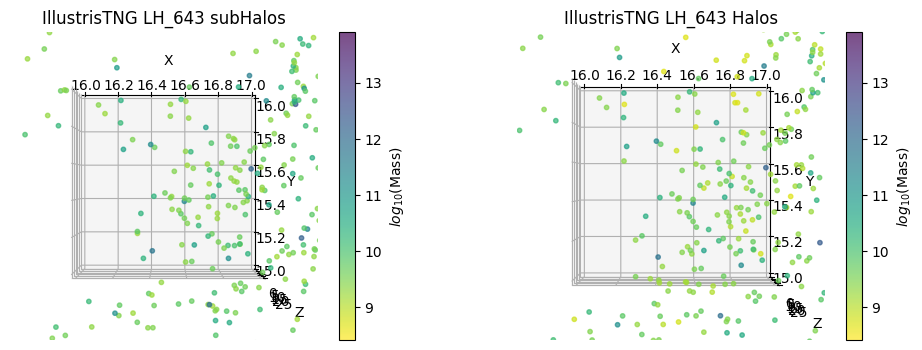

In [6]:
from matplotlib import cm
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1,projection='3d')
colormap = cm.get_cmap('viridis')
# Reverse the colormap
reversed_colormap = colormap.reversed()
scatter = ax.scatter(pos_g[:,0] , pos_g[:,1], pos_g[:,2], c=np.log10(mass_g), cmap=reversed_colormap,
                     vmin=min(np.log10(mass_g)), vmax=max(np.log10(mass_h)), marker='o', s=10,alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('IllustrisTNG LH_643 subHalos')
ax.view_init(elev=90, azim=270)
ax.set_box_aspect([1,1,1])
ax.set_xlim(16,17)
ax.set_ylim(15,16)
# Add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label(r'$log_{10}$(Mass)')
ax2 = fig.add_subplot(1,2,2,projection='3d')
scatter2 = ax2.scatter(pos_h[:,0] , pos_h[:,1], pos_h[:,2], c=np.log10(mass_h), cmap=reversed_colormap,
                       vmin=min(np.log10(mass_g)), vmax=max(np.log10(mass_h)), marker='o', s=10,alpha=0.7)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('IllustrisTNG LH_643 Halos')
ax2.view_init(elev=90, azim=270)
ax2.set_xlim(16,17)
ax2.set_ylim(15,16)
# Add colorbar
cbar = fig.colorbar(scatter2)
cbar.set_label(r'$log_{10}$(Mass)')

We see that the halos which do not contain any galaxies (subhalos) are the lightest. Thus there are more halos than galaxies (subhalos).

### Slicing Subhalos like toast

In [72]:
box_length = 25.0  # Length of the 3D box
num_slices = 15  # Number of slices

slice_size = box_length / num_slices  # Size of each slice along the z-axis

# Initialize an empty dictionary to store the particle positions for each slice
sliced_positions = {}
sliced_masses = {}
# Initialize the dictionary with empty arrays for each slice
for i in range(num_slices):
    sliced_positions[i] = []
    sliced_masses[i] = []
# Iterate over each particle position
for position in pos_g2:
    # Calculate the index of the slice based on the z-coordinate
    slice_index = int(position[2] // slice_size)

    # Append the position to the corresponding slice's array
    sliced_positions[slice_index].append(position)
    pos_index = np.where(pos_g==position)[0][0]
    sliced_masses[slice_index].append(mass_g[pos_index])

# Convert the lists to numpy arrays
for slice_index in sliced_positions:
    sliced_positions[slice_index] = np.array(sliced_positions[slice_index])
    sliced_masses[slice_index] = np.array(sliced_masses[slice_index])
# Print the positions for each slice
for slice_index in sliced_positions:
    print(f"Slice {slice_index} shape: ", sliced_positions[slice_index].shape)

Slice 0 shape:  (172, 3)
Slice 1 shape:  (63, 3)
Slice 2 shape:  (59, 3)
Slice 3 shape:  (51, 3)
Slice 4 shape:  (60, 3)
Slice 5 shape:  (76, 3)
Slice 6 shape:  (159, 3)
Slice 7 shape:  (75, 3)
Slice 8 shape:  (122, 3)
Slice 9 shape:  (134, 3)
Slice 10 shape:  (123, 3)
Slice 11 shape:  (132, 3)
Slice 12 shape:  (155, 3)
Slice 13 shape:  (471, 3)
Slice 14 shape:  (209, 3)


<IPython.core.display.Javascript object>


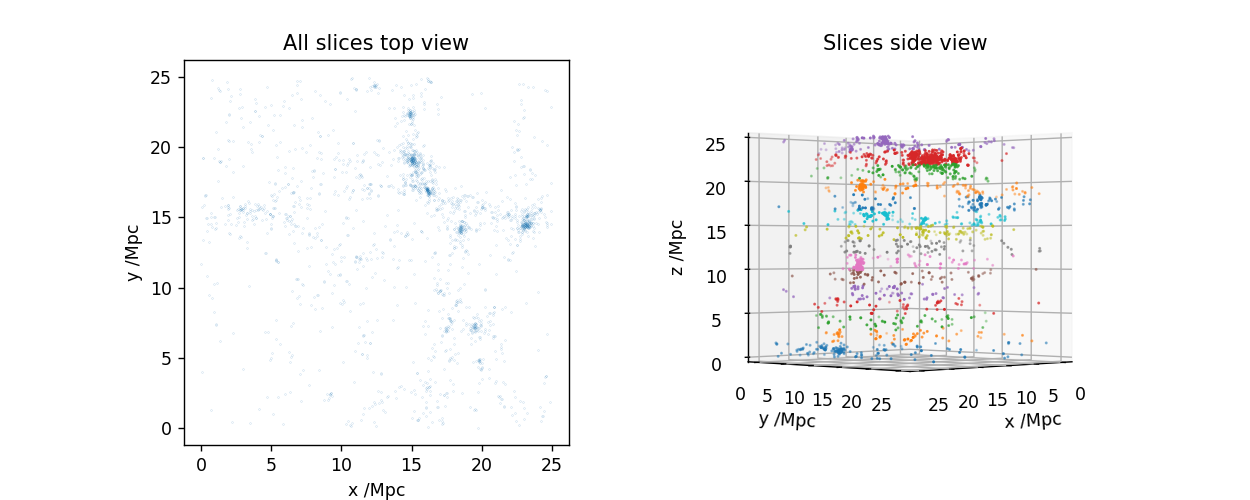

In [73]:
%matplotlib notebook
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, projection ='3d')
#pos_g1 = pos_g[mass_g > np.median(mass_g,axis=0)]
ax1.scatter(pos_g2[:,0] , pos_g2[:,1], marker='o', s=0.005)
ax1.set_xlabel('x /Mpc')
ax1.set_ylabel('y /Mpc')
ax1.set_title('All slices top view')
ax1.set_box_aspect(1)
for j in range(0,num_slices,1):
    ax2.scatter(sliced_positions[j][:,0] , sliced_positions[j][:,1], sliced_positions[j][:,2], marker='o', s=0.5)
ax2.view_init(elev=0, azim=45)
ax2.set_xlabel('x /Mpc')
ax2.set_ylabel('y /Mpc')
ax2.set_zlabel('z /Mpc')
ax2.set_title('Slices side view')
ax2.set_zlim(0,25)
ax2.set_box_aspect([1,1,1])

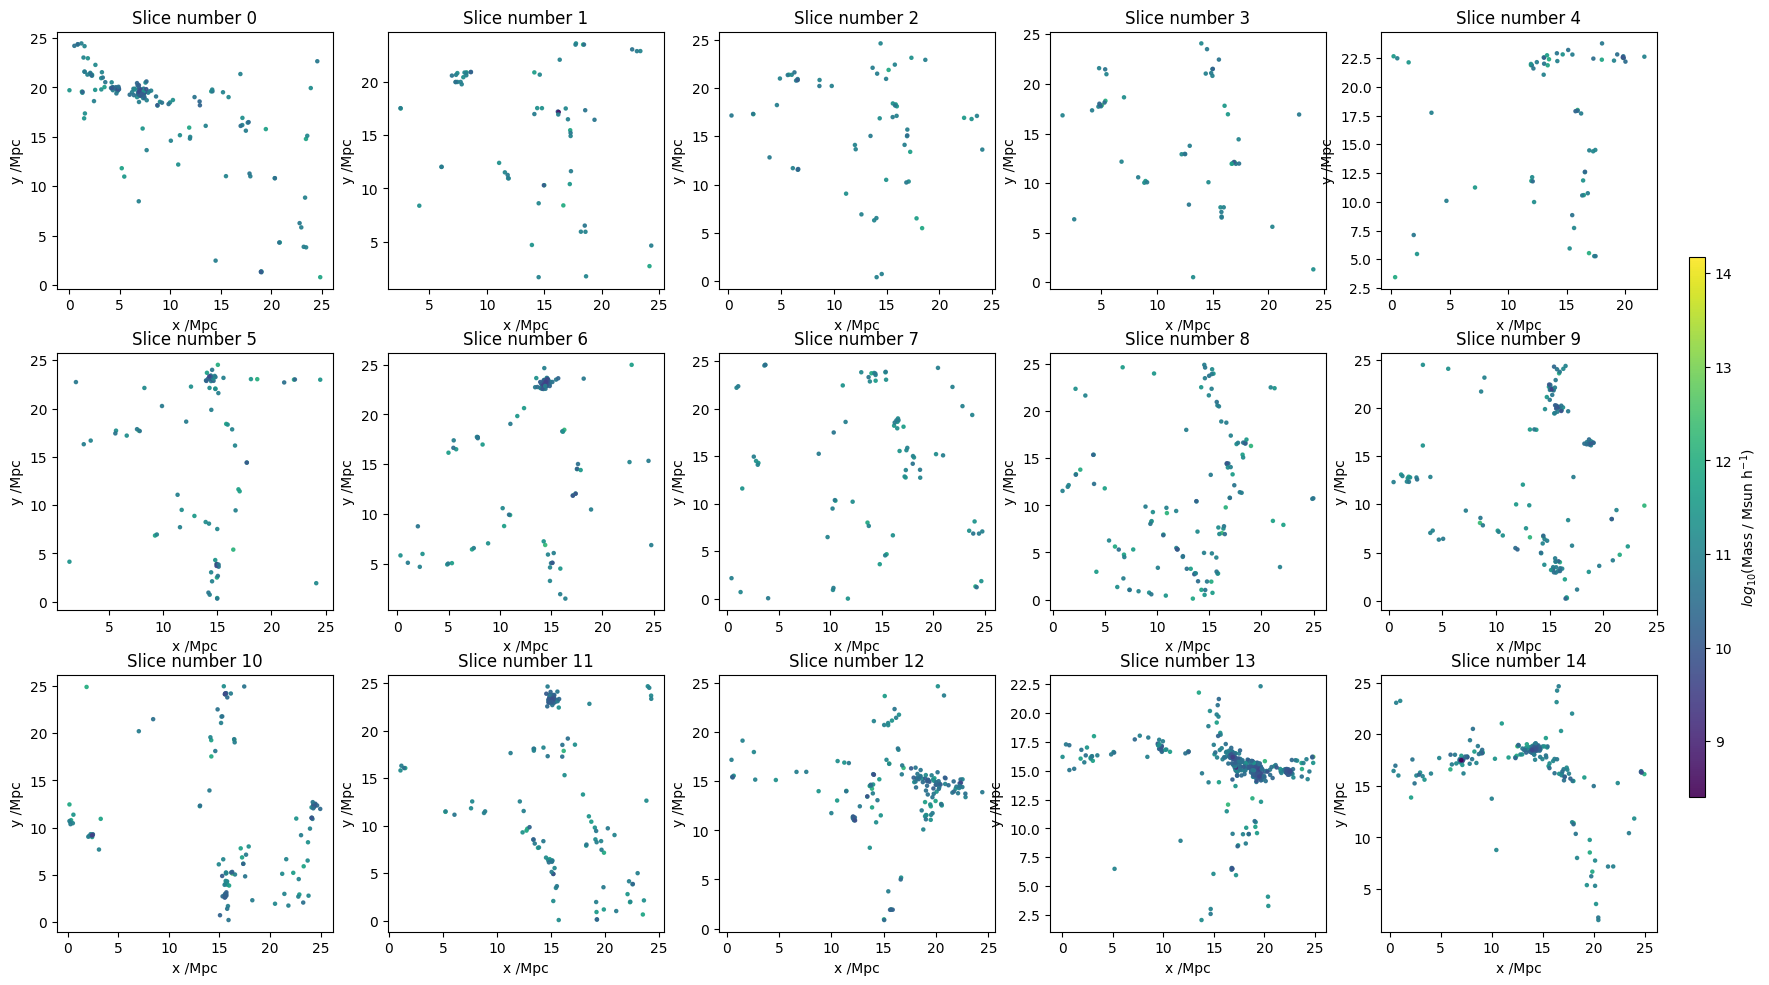

In [82]:
%matplotlib inline
fig = plt.figure(figsize=(16,9))
cbar_ax = fig.add_axes([1.02, 0.15, 0.01, 0.6])  # Define position of the colorbar
for i in range(15):
    ax = fig.add_subplot(3,5,i+1)
    im= ax.scatter(sliced_positions[i][:,1] , sliced_positions[i][:,0], c=np.log10(sliced_masses[i]),
               vmin=min(np.log10(mass_g)), vmax=max(np.log10(mass_g)), marker='o', s=5, alpha=0.9)
    ax.set_xlabel('x /Mpc')
    ax.set_ylabel('y /Mpc')
    ax.set_title(f'Slice number {i}')

cbar = fig.colorbar(im, cax=cbar_ax)  # Use the predefined colorbar axes
cbar.set_label(r'$log_{10}$(Mass / Msun h$^{-1}$)')
fig.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, 
                        wspace=0.2, 
                        hspace=0.25)

In [10]:
#import 2D image from CMD
IllustrisTNG_Mtot = r'C:\CAMELS DATA\Maps_Mtot_IllustrisTNG_LH_z=0.00.npy'
param_path = r'C:\CAMELS DATA\params_LH_IllustrisTNG.txt'
# Read the file and store the contents in a NumPy array
Illustris_params = np.loadtxt(param_path)
# Print the shape of the param array
print("param data shape:", Illustris_params.shape)
# load CMD 2D maps
image_Mtot_Ill = np.load(IllustrisTNG_Mtot)
print(image_Mtot_Ill.shape)

param data shape: (1000, 6)
(15000, 256, 256)


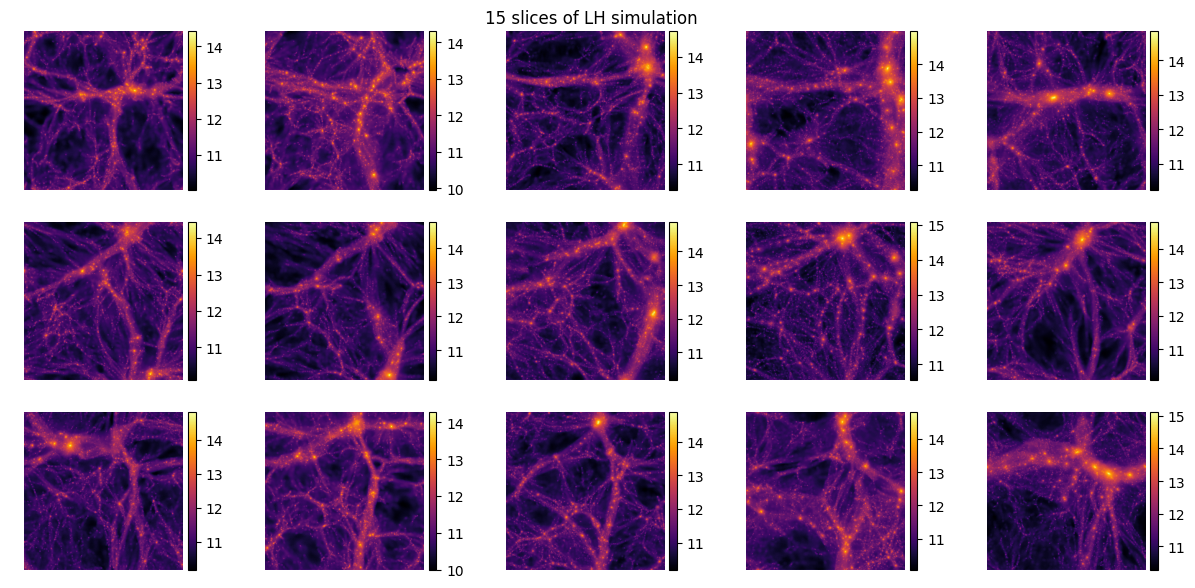

Value of the parameters for this map
Omega_m: 0.46540
sigma_8: 0.98100
A_SN1:   0.32760
A_AGN1:  2.50707
A_SN2:   1.56808
A_AGN2:  1.78139


In [75]:
num = 643*15 # number image
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig1 = plt.figure(figsize=(15,7))
plt.title('15 slices of LH simulation')
plt.axis('off')
for i in range(15):
    ax = fig1.add_subplot(3,5,i+1)
    im = ax.imshow(np.log10(image_Mtot_Ill[num+i]+1),cmap='inferno', origin='lower')
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, ax=ax, cax=cax)

plt.show()
params_map = Illustris_params[num//15]
print('Value of the parameters for this map')
print('Omega_m: %.5f'%params_map[0])
print('sigma_8: %.5f'%params_map[1])
print('A_SN1:   %.5f'%params_map[2])
print('A_AGN1:  %.5f'%params_map[3])
print('A_SN2:   %.5f'%params_map[4])
print('A_AGN2:  %.5f'%params_map[5])

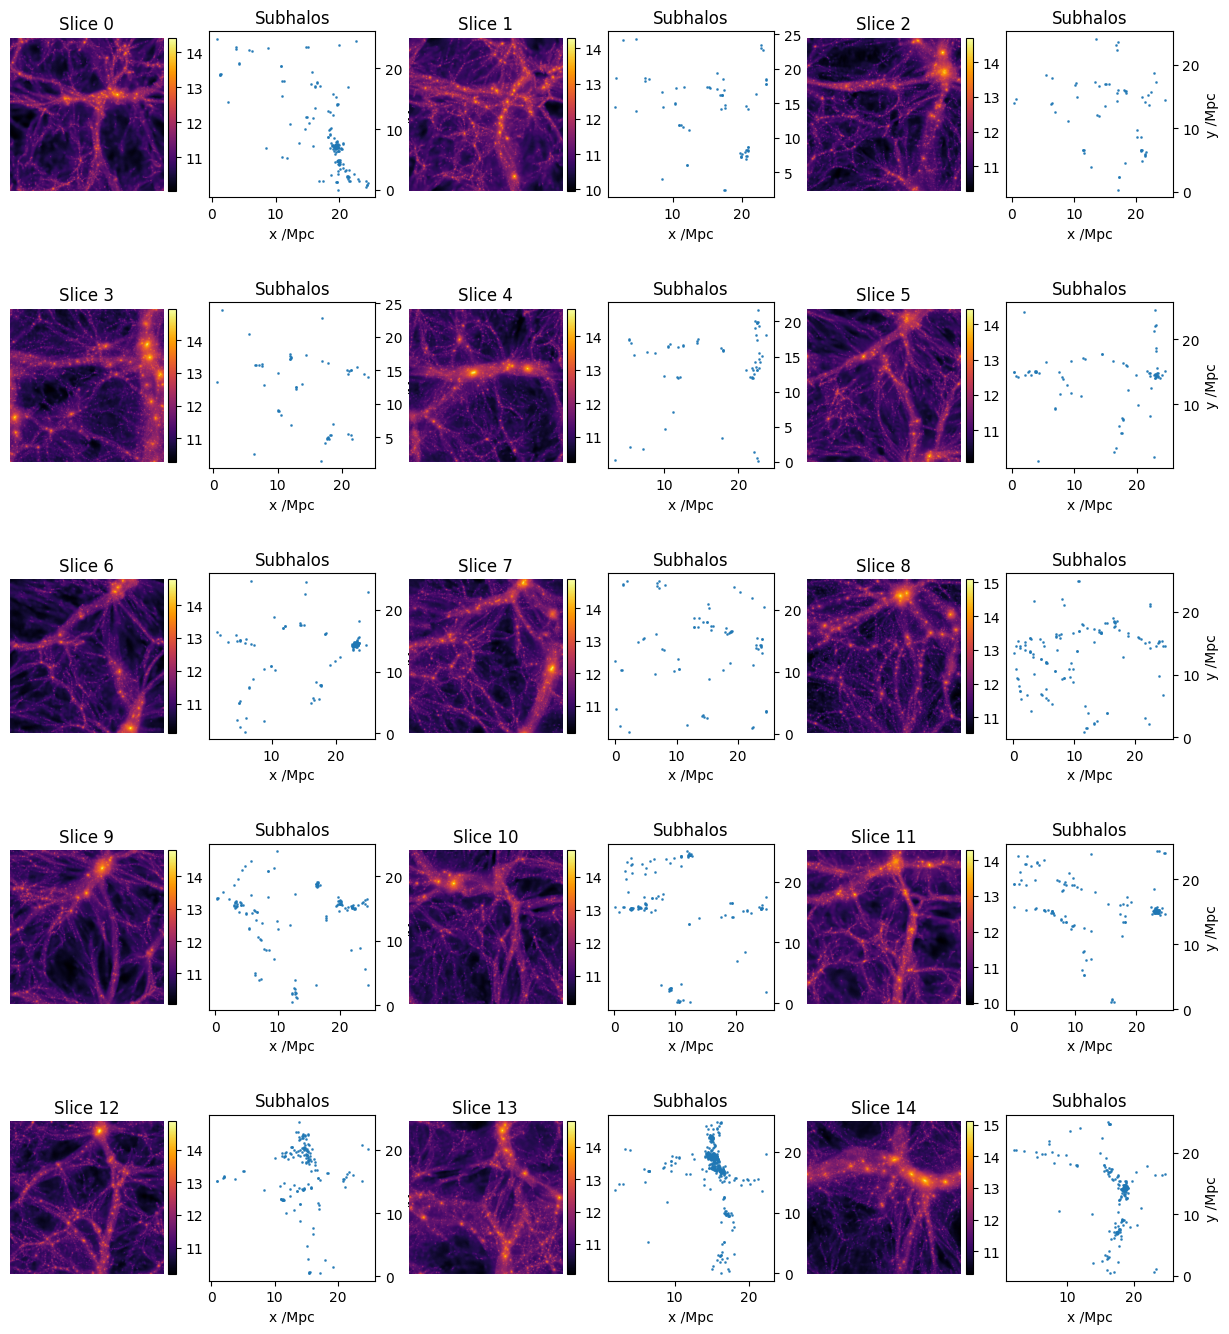

In [76]:
#visualising the 2D Images
fig1 = plt.figure(figsize=(15,17))
#plt.title('Simulation:')


for i in range(30):
    ax = fig1.add_subplot(5,6,i+1)
    if i%2 == 0:
        im = ax.imshow(np.log10(image_Mtot_Ill[num+int(i/2)]+1),cmap='inferno', origin='lower')
        ax.axis('off')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, ax=ax, cax=cax)
        ax.set_title(f'Slice {int(i/2)}')
    else:
        ax.scatter(sliced_positions[i//2][:,0] , sliced_positions[i//2][:,1], marker='o', s=0.9, alpha=0.8)
        ax.set_xlabel('x /Mpc')
        ax.set_ylabel('y /Mpc')
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
        ax.set_title(f'Subhalos')
        ax.set_box_aspect(1)

plt.show()

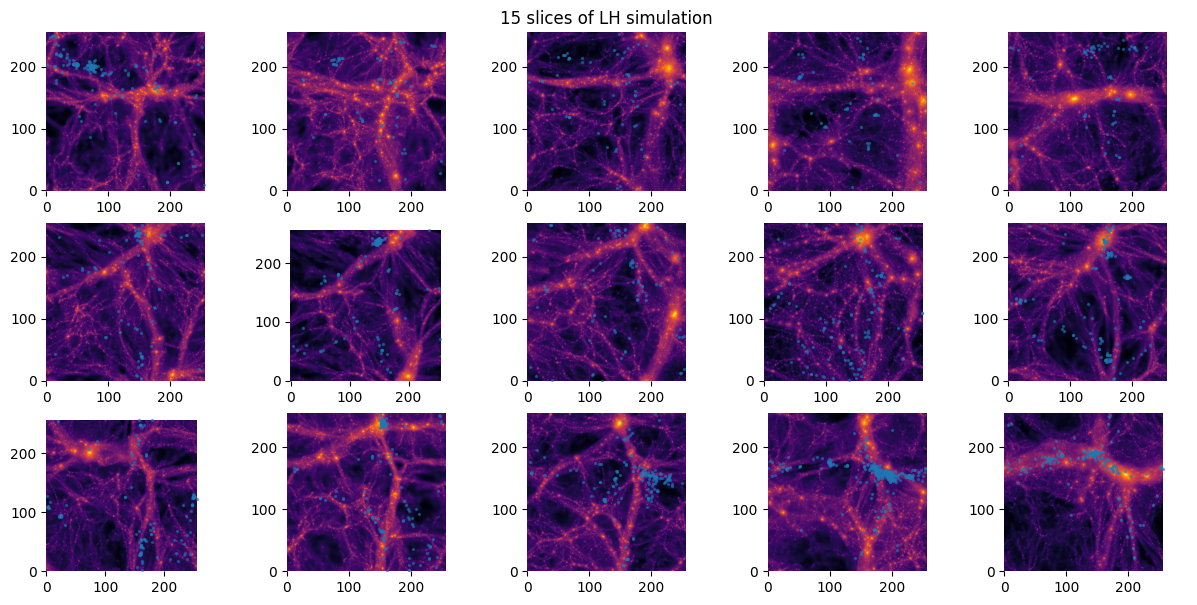

In [78]:
fig1 = plt.figure(figsize=(15,7))
plt.title('15 slices of LH simulation')
plt.axis('off')
for i in range(15):
    xcoor = sliced_positions[i][:,1]*(256/25)
    ycoor = sliced_positions[i][:,0]*(256/25)
    ax = fig1.add_subplot(3,5,i+1)
    im = ax.imshow(np.log10(image_Mtot_Ill[num+i]+1),cmap='inferno', origin='lower')
    ax.scatter(xcoor , ycoor, marker='o', s=2, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.show()

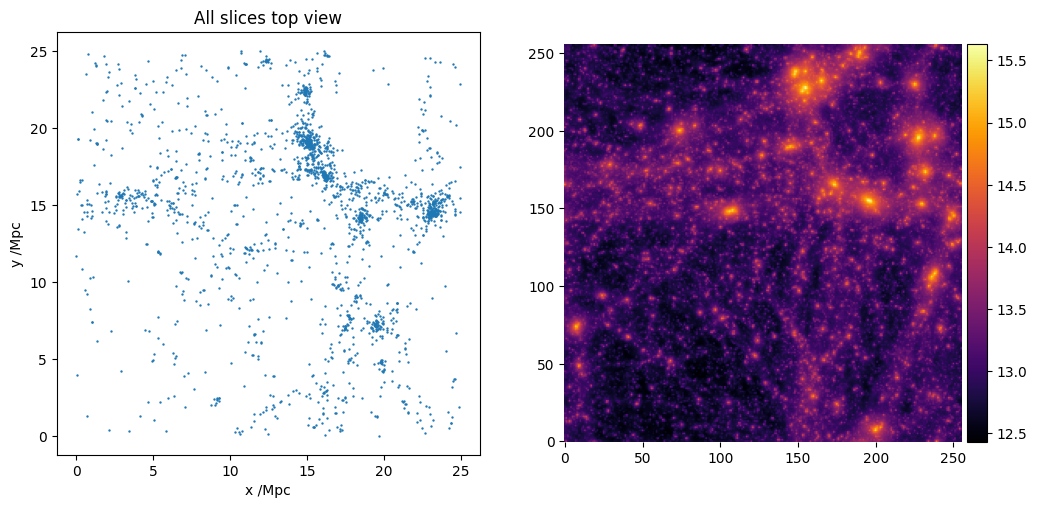

In [81]:
tot_image = image_Mtot_Ill[num]
for i in range(1,15):
    tot_image += image_Mtot_Ill[num+i]

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(pos_g2[:,0] , pos_g2[:,1], marker='o', s=0.5)
ax1.set_xlabel('x /Mpc')
ax1.set_ylabel('y /Mpc')
ax1.set_title('All slices top view')
ax1.set_box_aspect(1)
im = ax2.imshow(np.log10(tot_image+1),cmap='inferno',origin='lower')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_title('All Images top view')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, ax=ax, cax=cax)


Text(0, 0.5, 'z /Mpc')

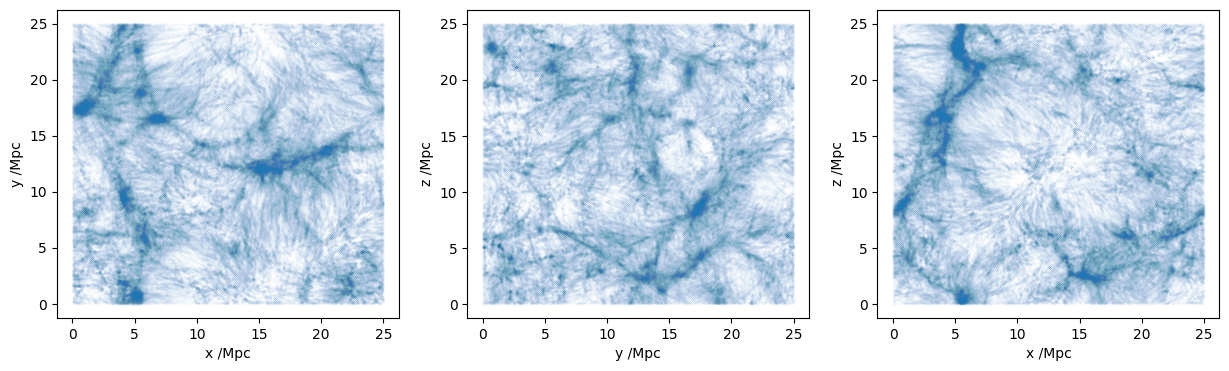